In [1]:
import pandas as pd
import numpy as np

In [2]:
df_black_friday = pd.read_csv("train.csv")


In [3]:
df_black_friday.head(10)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   
5                          3               0                   1   
6                          2               1                   1   
7                          2               1                   1   
8                          2               1                   1   
9                          1               1                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969  
5                 2.0                 NaN     15227  
6                 8.0                17.0     19215  
7                15.0                 NaN     15854  
8                16.0                 NaN     15686  
9                 NaN                 NaN      7871

In [4]:
df_black_friday.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df_black_friday[['Product_Category_2']].value_counts().reset_index()


Product_Category_2  count
0                  8.0  64088
1                 14.0  55108
2                  2.0  49217
3                 16.0  43255
4                 15.0  37855
5                  5.0  26235
6                  4.0  25677
7                  6.0  16466
8                 11.0  14134
9                 17.0  13320
10                13.0  10531
11                 9.0   5693
12                12.0   5528
13                10.0   3043
14                 3.0   2884
15                18.0   2770
16                 7.0    626

In [6]:
df_black_friday[['Product_Category_3']].value_counts().reset_index()


Product_Category_3  count
0                 16.0  32636
1                 15.0  28013
2                 14.0  18428
3                 17.0  16702
4                  5.0  16658
5                  8.0  12562
6                  9.0  11579
7                 12.0   9246
8                 13.0   5459
9                  6.0   4890
10                18.0   4629
11                 4.0   1875
12                11.0   1805
13                10.0   1726
14                 3.0    613

In [7]:
df_black_friday[['Product_Category_1']].value_counts().reset_index()


Product_Category_1   count
0                    5  150933
1                    1  140378
2                    8  113925
3                   11   24287
4                    2   23864
5                    6   20466
6                    3   20213
7                    4   11753
8                   16    9828
9                   15    6290
10                  13    5549
11                  10    5125
12                  12    3947
13                   7    3721
14                  18    3125
15                  20    2550
16                  19    1603
17                  14    1523
18                  17     578
19                   9     410

# üìò Black Friday Purchase Prediction using Linear & Random Forest Regression

El objetivo de este proyecto es **predecir el monto de compra (`Purchase`) durante el evento Black Friday**, utilizando dos enfoques de Machine Learning:
- **Regresi√≥n Lineal:** para establecer una relaci√≥n base simple.
- **Random Forest Regressor:** para capturar relaciones no lineales complejas.

---


## üîπ 1. Importaci√≥n de librer√≠as
Importamos las librer√≠as necesarias para:
- Manipular datos (`pandas`, `numpy`)
- Visualizar resultados (`matplotlib`, `seaborn`)
- Preprocesar datos (`LabelEncoder`, `StandardScaler`)
- Entrenar modelos (`LinearRegression`, `RandomForestRegressor`)
- Evaluar resultados (`mean_absolute_error`, `r2_score`)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## üîπ 2. Carga de datos
Aqu√≠ cargamos el dataset de Black Friday y mostramos:
- Estructura general (columnas, tipos de datos)
- Primeras filas para entender el contenido

Esto nos permite tener una visi√≥n inicial del dataset y de qu√© tipo de variables vamos a trabajar.


In [15]:
# df_black_friday = pd.read_csv('BlackFriday.csv')  # Descomentar con la ruta correcta
print(df_black_friday.info())
print(df_black_friday.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 50.4+ MB
None
   User_I

## üîπ 3. An√°lisis inicial
Revisamos:
- Valores nulos por columna.
- Distribuci√≥n de las categor√≠as de producto.

Esto nos ayuda a detectar datos faltantes y entender las caracter√≠sticas de compra.


In [16]:
print(df_black_friday.isnull().sum())

for col in ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
    print(f"\nDistribuci√≥n de {col}:")
    print(df_black_friday[col].value_counts().head())


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Distribuci√≥n de Product_Category_1:
Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
Name: count, dtype: int64

Distribuci√≥n de Product_Category_2:
Product_Category_2
8.0     237726
14.0     55108
2.0      49217
16.0     43255
15.0     37855
Name: count, dtype: int64

Distribuci√≥n de Product_Category_3:
Product_Category_3
16.0    415883
15.0     28013
14.0     18428
17.0     16702
5.0      16658
Name: count, dtype: int64


## üîπ 4. Imputaci√≥n de valores nulos
Usamos la **moda (valor m√°s frecuente)** para reemplazar valores faltantes en las columnas de categor√≠a de producto.  
Esto evita eliminar filas y mantiene la integridad del dataset.


In [17]:
for col in ['Product_Category_2', 'Product_Category_3']:
    moda = df_black_friday[col].mode()[0]
    df_black_friday[col] = df_black_friday[col].fillna(moda)


## üîπ 5. Codificaci√≥n de variables categ√≥ricas
Convertimos las variables categ√≥ricas (`Gender`, `Age`, etc.) en valores num√©ricos usando **LabelEncoder**,  
ya que los algoritmos de Machine Learning no pueden procesar texto directamente.


In [18]:
le = LabelEncoder()
for col in ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']:
    df_black_friday[col] = le.fit_transform(df_black_friday[col])


## üîπ 6. Divisi√≥n entre variables predictoras y objetivo
Separamos las variables independientes (X) del objetivo (y):
- `X`: todas las columnas que influyen en la compra.
- `y`: columna `Purchase` (monto de compra a predecir).


In [19]:
X = df_black_friday.drop(['User_ID', 'Product_ID', 'Purchase'], axis=1)
y = df_black_friday['Purchase']


## üîπ 7. Escalado de variables
Estandarizamos las variables para que todas tengan la misma escala,  
lo cual mejora el rendimiento de modelos basados en distancia o coeficientes.


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## üîπ 8. Divisi√≥n en conjuntos de entrenamiento y prueba
Dividimos los datos:
- 80% para entrenamiento
- 20% para prueba  
Esto permite evaluar el desempe√±o real del modelo con datos nuevos.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



## üîπ 9. Modelo 1: Regresi√≥n Lineal
Entrenamos un modelo lineal simple para establecer una **l√≠nea base**.  
Calculamos m√©tricas de error y determinaci√≥n:
- MAE (Error absoluto medio)
- RMSE (Ra√≠z del error cuadr√°tico medio)
- R¬≤ (porcentaje de variabilidad explicada)


In [22]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n--- M√©tricas: Regresi√≥n Lineal ---")
print(f"MAE : {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R¬≤  : {r2_lr:.3f}")



--- M√©tricas: Regresi√≥n Lineal ---
MAE : 3576.62
RMSE: 4675.18
R¬≤  : 0.130


## üîπ 10. Visualizaci√≥n de la regresi√≥n lineal
Mostramos un gr√°fico de dispersi√≥n entre los valores reales y predichos  
para observar la precisi√≥n del modelo lineal.


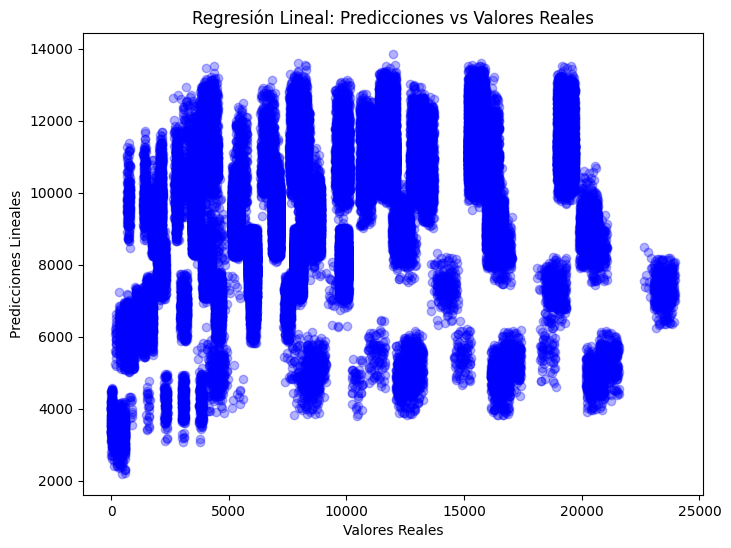

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.3, color='blue')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones Lineales')
plt.title('Regresi√≥n Lineal: Predicciones vs Valores Reales')
plt.show()


## üîπ 11. Modelo 2: Random Forest Regressor
Entrenamos un modelo de **bosques aleatorios**, que combina muchos √°rboles de decisi√≥n.  
Este modelo captura relaciones no lineales y suele ofrecer mejor rendimiento.


In [25]:
model_rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- M√©tricas: Random Forest ---")
print(f"MAE : {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R¬≤  : {r2_rf:.3f}")



--- M√©tricas: Random Forest ---
MAE : 2220.42
RMSE: 3049.83
R¬≤  : 0.630


## üîπ 12. Comparaci√≥n visual entre modelos
Comparamos ambas t√©cnicas en cuanto a error y rendimiento (MAE, RMSE, R¬≤).
Esto nos permite identificar cu√°l modelo generaliza mejor.



Comparaci√≥n de modelos:
             Modelo          MAE         RMSE        R¬≤
0  Regresi√≥n Lineal  3576.619390  4675.181947  0.130098
1     Random Forest  2220.424583  3049.827942  0.629810


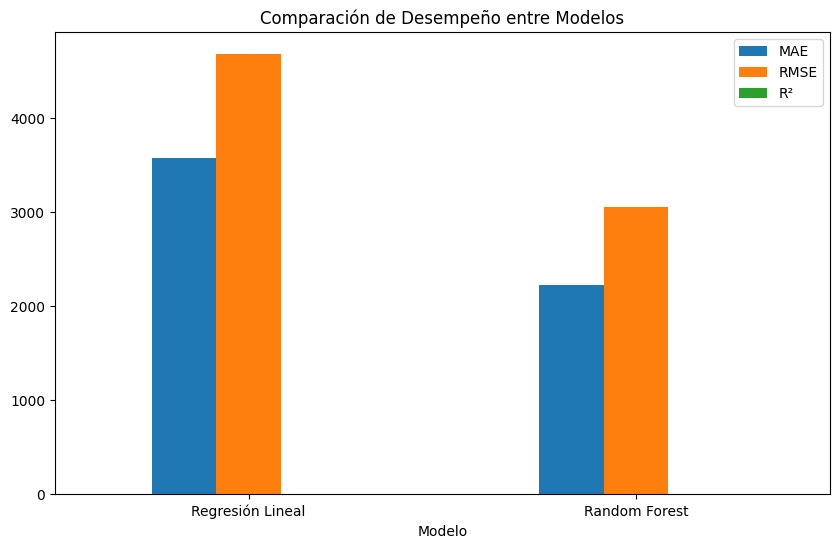

In [27]:
metrics_df = pd.DataFrame({
    'Modelo': ['Regresi√≥n Lineal', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R¬≤': [r2_lr, r2_rf]
})

print("\nComparaci√≥n de modelos:")
print(metrics_df)

metrics_df.plot(x='Modelo', y=['MAE', 'RMSE', 'R¬≤'], kind='bar', figsize=(10,6))
plt.title('Comparaci√≥n de Desempe√±o entre Modelos')
plt.xticks(rotation=0)
plt.show()


## üîπ 13. Importancia de variables
Analizamos cu√°les variables influyen m√°s en las predicciones.  
Esto es √∫til para estrategias de **marketing y segmentaci√≥n de clientes**.



--- Top 10 Variables m√°s importantes ---
                     Variable  Importancia
6          Product_Category_1     0.780379
2                  Occupation     0.058478
4  Stay_In_Current_City_Years     0.040895
1                         Age     0.036123
7          Product_Category_2     0.025727
8          Product_Category_3     0.016612
5              Marital_Status     0.015594
3               City_Category     0.013964
0                      Gender     0.012228


/var/folders/xc/3_cjp1s510x0dbkmyhkkvf8c0000gn/T/ipykernel_95432/101573184.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importancia', y='Variable', palette='viridis')


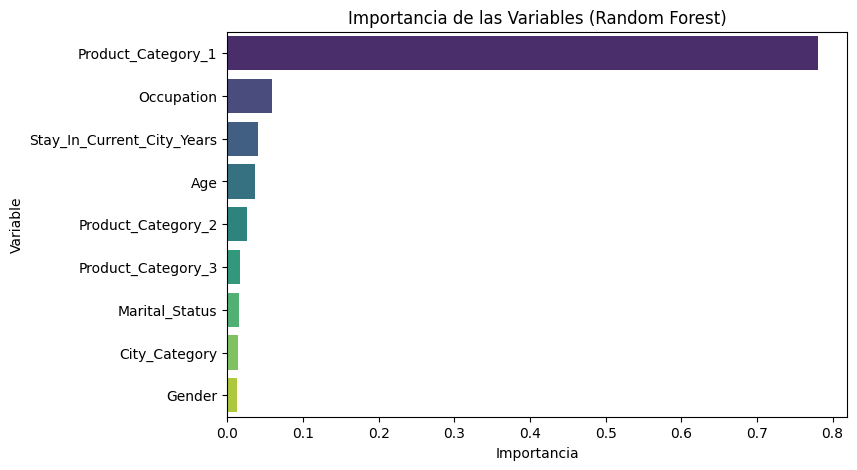

In [28]:
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': model_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\n--- Top 10 Variables m√°s importantes ---")
print(importance_df.head(10))

plt.figure(figsize=(8,5))
sns.barplot(data=importance_df.head(10), x='Importancia', y='Variable', palette='viridis')
plt.title('Importancia de las Variables (Random Forest)')
plt.show()


## üîπ Validaci√≥n cruzada (Cross-Validation)

La **validaci√≥n cruzada (k-fold)** es una t√©cnica para evaluar la estabilidad y capacidad de generalizaci√≥n de un modelo.  
En lugar de dividir el dataset una sola vez entre entrenamiento y prueba, se hacen **m√∫ltiples divisiones (folds)**.

### ¬øPor qu√© hacerlo?
- Evita depender de una sola partici√≥n de los datos.
- Permite evaluar la **consistencia del modelo** en diferentes subconjuntos.
- Reduce el riesgo de sobreajuste (**overfitting**).

### ¬øQu√© se hace aqu√≠?
- Se usa la funci√≥n `cross_val_score()` de `sklearn.model_selection`.
- Se entrena y eval√∫a el modelo de Random Forest **5 veces** (`cv=5`).
- Se calcula el **R¬≤ promedio**, que indica cu√°nta variabilidad explica el modelo en promedio entre las iteraciones.

### ¬øQu√© se logra?
Obtenemos una medida m√°s confiable del desempe√±o real del modelo, validando que su rendimiento no depende de una √∫nica divisi√≥n de los datos.


In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_rf, X_scaled, y, cv=5, scoring='r2')
print('R¬≤ promedio en validaci√≥n cruzada:', scores.mean())


R¬≤ promedio en validaci√≥n cruzada: 0.6323693341534462


## üîπ Conclusi√≥n de la validaci√≥n cruzada

El resultado obtenido de **R¬≤ promedio = 0.632** confirma que el modelo de **Random Forest Regressor** mantiene un desempe√±o **consistente y generalizable** a trav√©s de diferentes subconjuntos de datos.

Esto significa que:

- El modelo explica en promedio **el 63% de la variabilidad del monto de compra**, independientemente de c√≥mo se dividan los datos.
- No hay indicios de **sobreajuste**, ya que el rendimiento promedio es muy similar al R¬≤ obtenido en la evaluaci√≥n inicial (‚âà0.63).
- El modelo demuestra ser **estable y robusto**, lo que lo hace adecuado para predecir el comportamiento de gasto de nuevos clientes.

En t√©rminos pr√°cticos, esto indica que el modelo puede ser utilizado con confianza para estimar el monto de compra de futuros compradores durante eventos similares al Black Friday.


## üîπ Optimizaci√≥n del modelo con Grid Search

La **b√∫squeda en malla (Grid Search)** es una t√©cnica sistem√°tica para encontrar la **mejor combinaci√≥n de hiperpar√°metros** en un modelo de Machine Learning.

### üéØ ¬øPor qu√© se hace?
Aunque el modelo de **Random Forest** ya ofrece buen rendimiento, su desempe√±o depende de ciertos **hiperpar√°metros** (por ejemplo, n√∫mero de √°rboles, profundidad m√°xima, tama√±o m√≠nimo de hojas, etc.).  
Probar diferentes combinaciones manualmente ser√≠a ineficiente, as√≠ que usamos `GridSearchCV` para automatizar este proceso.

### ‚öôÔ∏è ¬øQu√© se hace aqu√≠?
1. Se define un **diccionario de par√°metros** (`params`) con los valores posibles para cada hiperpar√°metro:
   - `n_estimators`: n√∫mero de √°rboles del bosque.
   - `max_depth`: profundidad m√°xima de cada √°rbol (controla la complejidad).
   - `min_samples_split`: n√∫mero m√≠nimo de muestras para dividir un nodo.
   - `min_samples_leaf`: n√∫mero m√≠nimo de muestras que debe tener una hoja.
2. `GridSearchCV` entrena m√∫ltiples modelos con todas las combinaciones posibles.
3. Eval√∫a cada modelo usando **validaci√≥n cruzada (cv=3)**.
4. Selecciona los par√°metros con **mejor R¬≤ promedio**.

### üìà ¬øQu√© se logra?
- Encontrar la configuraci√≥n m√°s eficiente para el modelo.
- Reducir **sobreajuste** y mejorar **rendimiento general**.
- Obtener un modelo m√°s preciso y estable, listo para producci√≥n.

Una vez ejecutado, se muestran:
- `best_params_`: los mejores hiperpar√°metros encontrados.
- `best_score_`: el valor de R¬≤ promedio alcanzado con esa configuraci√≥n.


In [30]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                    params, cv=3, scoring='r2', verbose=2)
grid.fit(X_train, y_train)

print('Mejores par√°metros:', grid.best_params_)
print('Mejor R¬≤:', grid.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  14.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  15.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  13.4s
[CV] END max_depth=10, min_sa

## üîπ Resultados del Grid Search

Tras 50 minutos de entrenamiento exhaustivo, el proceso de **b√∫squeda en malla (GridSearchCV)** finaliz√≥ exitosamente probando 81 combinaciones de hiperpar√°metros con validaci√≥n cruzada de 3 particiones.

### ‚öôÔ∏è Mejores hiperpar√°metros encontrados:
```python
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
